# Image Classification with CNN, SVM, and Random Forest

## Introduction
This notebook demonstrates the process of training a Convolutional Neural Network (CNN) for image classification. Additionally, it includes the use of SVM and Random Forest classifiers for comparative analysis. The following steps are covered:



1. TensorFlow setup and data loading
2. Model definition and training
3. Visualization of CNN layers
4. Evaluation and comparison with SVM and Random Forest

## TensorFlow Setup and Data Loading

We begin by ensuring the correct TensorFlow version and installing necessary packages :

In [1]:
'''
! pip freeze | findstr tensorflow
! pip --version
#! pip install --upgrade pip
! pip uninstall tensorflow
! pip install tensorflow==2.11
! pip install pydot
'''

'\n! pip freeze | findstr tensorflow\n! pip --version\n#! pip install --upgrade pip\n! pip uninstall tensorflow\n! pip install tensorflow==2.11\n! pip install pydot\n'

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

### Verify TensorFlow Version

In [2]:
import tensorflow as tf

print(tf.__version__)

2.11.0


## Data Specifications and Loading

### Defining batch specfications :

In [3]:
batch_size = 100
img_height = 250
img_width = 250

### loading training set :

In [4]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'Data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 852 files belonging to 2 classes.


### loading validation dataset :

In [5]:
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'Data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 159 files belonging to 2 classes.


### loading testing dataset :

In [6]:
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'Data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 161 files belonging to 2 classes.


In [7]:
testing_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
class_names = training_data.class_names

class_names

['Accident', 'Non Accident']

### Data Caching for Performance :

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)

testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

### CNN Model Definition :

In [10]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.build((None, 250, 250, 3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 250, 250, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                        

### Visualizing CNN Layers :

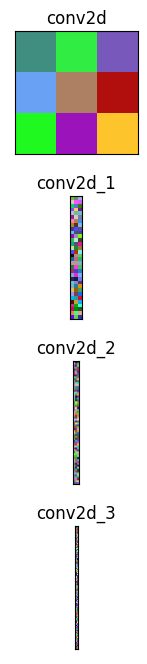

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_model(model):
    plt.figure(figsize=(10, 10))
    for i, layer in enumerate(model.layers):
        if 'conv' in layer.name:
            filters, biases = layer.get_weights()
            # Normalize filter values to 0-1 so we can visualize them
            filters -= filters.min()
            filters /= filters.max()
            n_filters = filters.shape[3]
            for j in range(n_filters):
                ax = plt.subplot(len(model.layers) // 2, 2, i + 1)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_title(layer.name)
                # Transpose the filter to proper dimensions for plotting
                filter_to_plot = np.transpose(filters[:, :, :, j], (2, 0, 1))
                plt.imshow(filter_to_plot, cmap='gray')
    plt.tight_layout()
    plt.show()

visualize_model(model)

## Model Training :

In [14]:
checkpoint = ModelCheckpoint("./model/model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 3.4955 - accuracy: 0.4836
Epoch 1: val_accuracy improved from -inf to 0.61006, saving model to ./model\model_weights.h5
9/9 [==============================] - 87s 8s/step - loss: 3.4955 - accuracy: 0.4836 - val_loss: 0.6769 - val_accuracy: 0.6101
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5481
Epoch 2: val_accuracy improved from 0.61006 to 0.64151, saving model to ./model\model_weights.h5
9/9 [==============================] - 69s 7s/step - loss: 0.6861 - accuracy: 0.5481 - val_loss: 0.6718 - val_accuracy: 0.6415
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.5822
Epoch 3: val_accuracy did not improve from 0.64151
9/9 [==============================] - 74s 8s/step - loss: 0.6608 - accuracy: 0.5822 - val_loss: 0.6677 - val_accuracy: 0.5786
Epoch 4/20
9/9 [==============================] - ETA: 0s - loss: 0.6243 - accuracy: 0.6432
Epoch 4: 

### Save Model Structure :

In [12]:
model_json = model.to_json()

with open("./model/model.json", "w") as json_file:
    json_file.write(model_json)

### Training and Validation Stats :

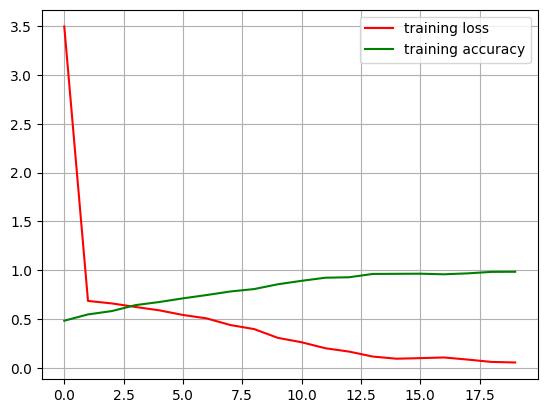

In [16]:
plt.plot(history.history['loss'], label = 'training loss', color='red')

plt.plot(history.history['accuracy'], label = 'training accuracy', color='green')

plt.grid(True)

plt.legend()

### Stats on training data :

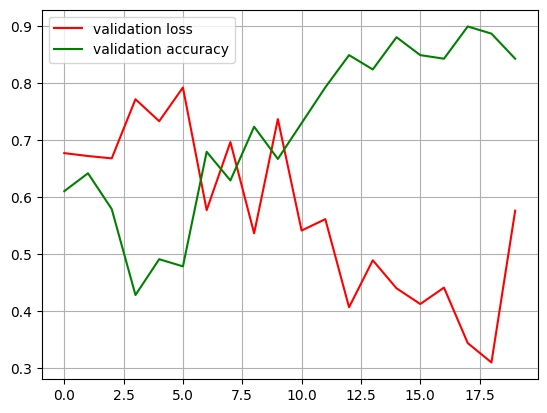

In [17]:
plt.plot(history.history['val_loss'], label = 'validation loss', color='red')

plt.plot(history.history['val_accuracy'], label = 'validation accuracy', color='green')

plt.grid(True)

plt.legend()

### Interactive Visualization on Testing Data :

4/4 [==============================] - 1s 258ms/step


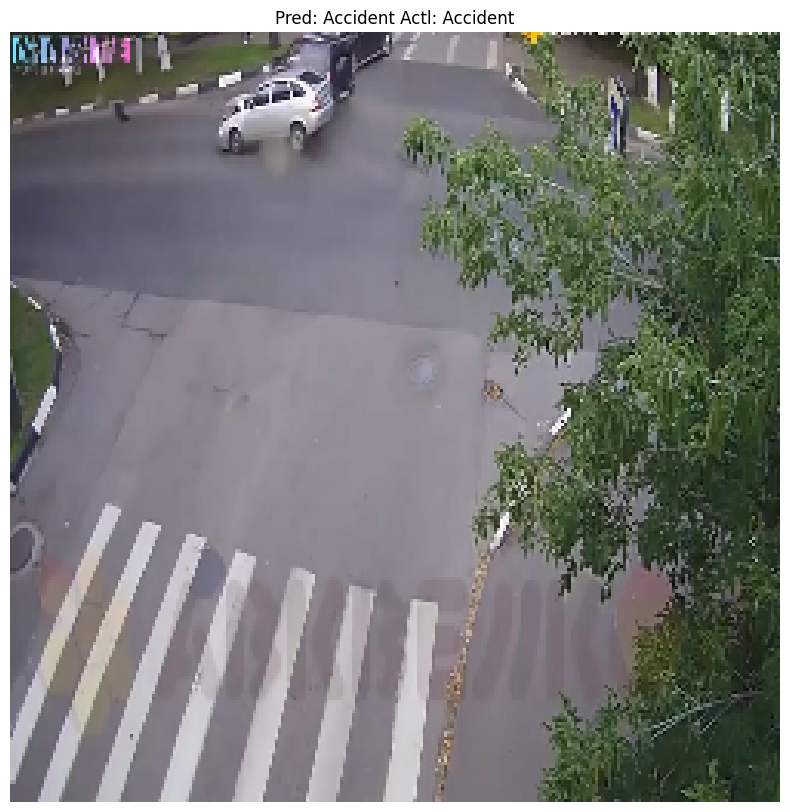

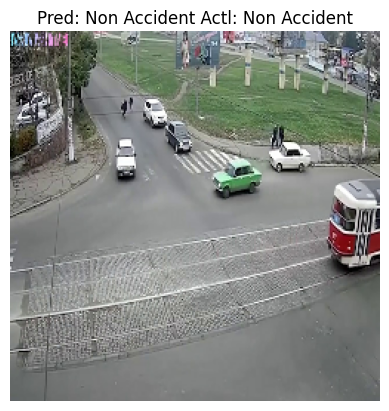

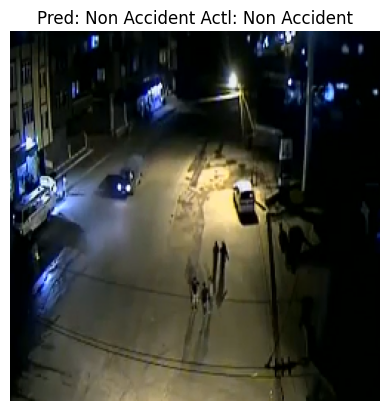

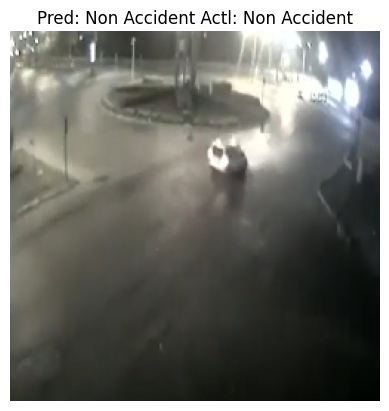

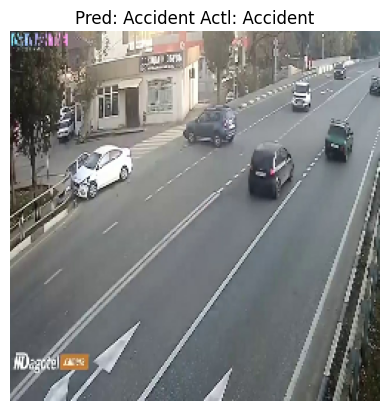

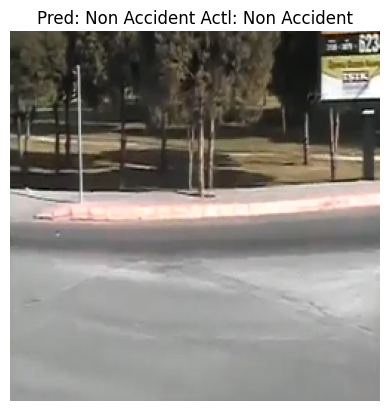

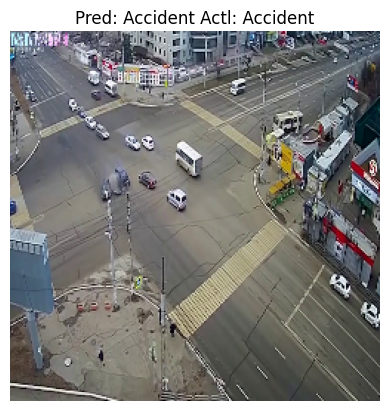

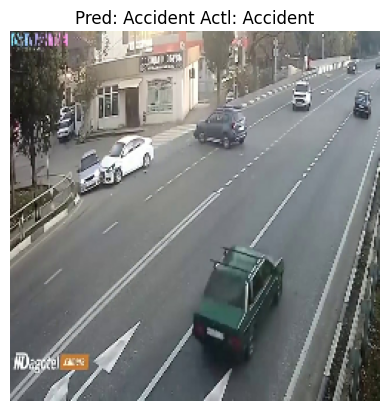

In [19]:
AccuracyVector = []

# Turn on interactive mode
plt.ion()
plt.figure(figsize=(10, 10))

for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    
    for i in range(8):
        plt.clf()  # Clear the current figure
        ax = plt.subplot(1, 1, 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: ' + predlabel[i] + ' Actl: ' + class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)
        plt.pause(1)  # Pause for 1 second between plots

# Turn off interactive mode
plt.ioff()
plt.show()

### SVM and Random Forest Classifiers :

In [14]:
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
 
# Définir les dimensions de l'image et la taille du batch
img_height = 250
img_width = 250
batch_size = 32
 
# Charger les données d'images
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)
 
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)
 
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)
 
# Charger un modèle pré-entraîné pour l'extraction des caractéristiques
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
 
# Geler les couches du modèle pré-entraîné
base_model.trainable = False
 
# Créer un modèle pour l'extraction des caractéristiques
feature_extractor = tf.keras.Model(
    inputs=base_model.input,
    outputs=base_model.output
)
 
# Extraire les caractéristiques des ensembles de données
def extract_features(dataset):
    features = []
    labels = []
    for images, lbls in dataset:
        features.append(feature_extractor(images))
        labels.append(lbls.numpy())
    return np.vstack(features), np.concatenate(labels)
 
training_features, training_labels = extract_features(training_data)
validation_features, validation_labels = extract_features(validation_data)
testing_features, testing_labels = extract_features(testing_data)
 
# Appliquer un flatten pour convertir les caractéristiques en un vecteur 1D
training_features_flat = training_features.reshape(training_features.shape[0], -1)
validation_features_flat = validation_features.reshape(validation_features.shape[0], -1)
testing_features_flat = testing_features.reshape(testing_features.shape[0], -1)
 
# Convertir les étiquettes en entiers
class_names = testing_data.class_names
training_labels = [class_names[label] for label in training_labels]
validation_labels = [class_names[label] for label in validation_labels]
testing_labels = [class_names[label] for label in testing_labels]
 
# Entraîner un classificateur SVM
svm_classifier = SVC()
svm_classifier.fit(training_features_flat, training_labels)
svm_accuracy = svm_classifier.score(validation_features_flat, validation_labels)
 
# Entraîner un classificateur Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(training_features_flat, training_labels)
rf_accuracy = rf_classifier.score(validation_features_flat, validation_labels)
 
# Prédictions des modèles
predictions_svm = svm_classifier.predict(testing_features_flat)
predictions_rf = rf_classifier.predict(testing_features_flat)
 
# Calcul des métriques pour chaque modèle
precision_svm = precision_score(testing_labels, predictions_svm, pos_label='Accident')
recall_svm = recall_score(testing_labels, predictions_svm, pos_label='Accident')
f1_score_svm = f1_score(testing_labels, predictions_svm, pos_label='Accident')
 
precision_rf = precision_score(testing_labels, predictions_rf, pos_label='Accident')
recall_rf = recall_score(testing_labels, predictions_rf, pos_label='Accident')
f1_score_rf = f1_score(testing_labels, predictions_rf, pos_label='Accident')
 
 
print("\nSVM Metrics:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_score_svm)
print("SVM Accuracy:", svm_accuracy)
 
print("\nRandom Forest Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_score_rf)
print("Random Forest Accuracy:", rf_accuracy)

Found 852 files belonging to 2 classes.
Found 159 files belonging to 2 classes.
Found 161 files belonging to 2 classes.

SVM Metrics:
Precision: 0.9807692307692307
Recall: 0.8095238095238095
F1-score: 0.8869565217391304
SVM Accuracy: 0.9056603773584906

Random Forest Metrics:
Precision: 1.0
Recall: 0.9682539682539683
F1-score: 0.9838709677419354
Random Forest Accuracy: 0.9433962264150944


### Metrics Calculation :

In [15]:
testing_labels = np.concatenate([y for x, y in testing_data], axis=0)
 
# Prédictions du modèle CNN
predictions_cnn = model.predict(testing_data)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)  # Convertir les probabilités en étiquettes prédites
 
# Calcul des métriques pour le modèle CNN
precision_cnn = precision_score(testing_labels, predicted_labels_cnn, average='weighted')
recall_cnn = recall_score(testing_labels, predicted_labels_cnn, average='weighted')
f1_score_cnn = f1_score(testing_labels, predicted_labels_cnn, average='weighted')
accuracy_cnn = accuracy_score(testing_labels, predicted_labels_cnn)
 
# Affichage des résultats pour CNN
print("\nCNN Metrics:")
print("Precision:", precision_cnn)
print("Recall:", recall_cnn)
print("F1-score:", f1_score_cnn)
print("Accuracy:", accuracy_cnn)

6/6 [==============================] - 3s 327ms/step

CNN Metrics:
Precision: 0.15311909262759926
Recall: 0.391304347826087
F1-score: 0.22010869565217392
Accuracy: 0.391304347826087


c:\Users\ACHRAF\OneDrive\Bureau\Accident-Detection-System-main_3\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualization of Metrics :

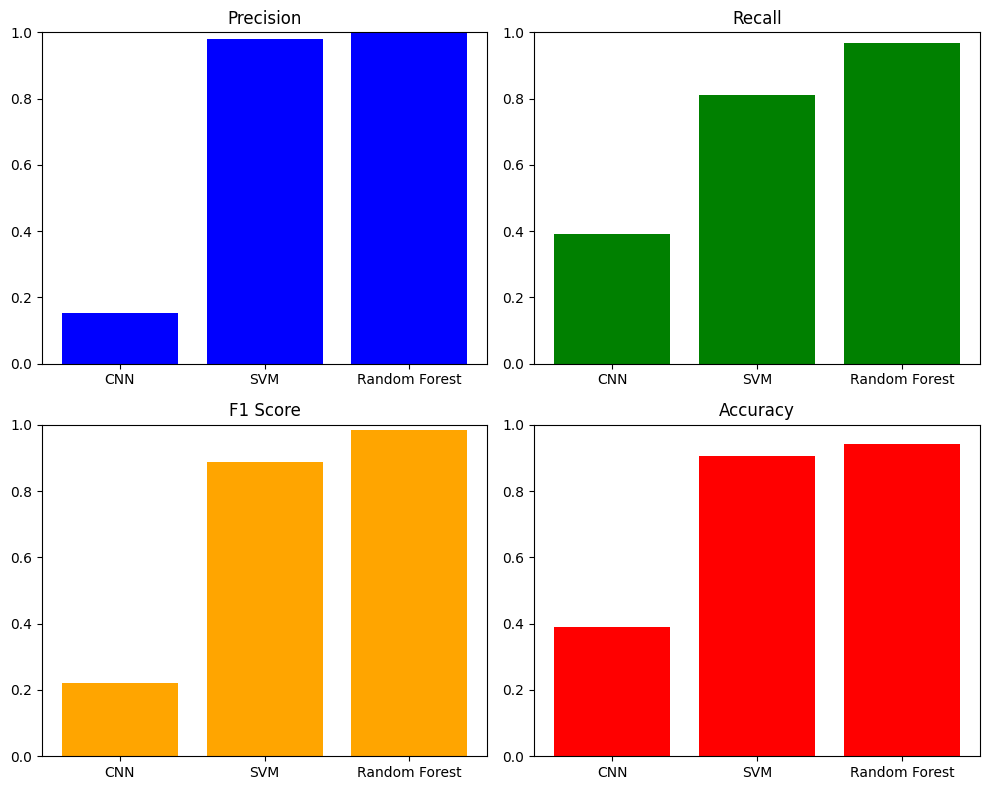

In [16]:
import matplotlib.pyplot as plt
import numpy as np
 
# Métriques pour chaque modèle
models = ['CNN', 'SVM', 'Random Forest']
precision = [precision_cnn, precision_svm, precision_rf]
recall = [recall_cnn, recall_svm, recall_rf]
f1_score = [f1_score_cnn, f1_score_svm, f1_score_rf]
accuracy = [accuracy_cnn, svm_accuracy, rf_accuracy]
 
# Création de graphiques séparés pour chaque métrique
plt.figure(figsize=(10, 8))
 
plt.subplot(221)
plt.bar(models, precision, color='blue')
plt.title('Precision')
plt.ylim(0, 1)
 
plt.subplot(222)
plt.bar(models, recall, color='green')
plt.title('Recall')
plt.ylim(0, 1)
 
plt.subplot(223)
plt.bar(models, f1_score, color='orange')
plt.title('F1 Score')
plt.ylim(0, 1)
 
plt.subplot(224)
plt.bar(models, accuracy, color='red')
plt.title('Accuracy')
plt.ylim(0, 1)
 
plt.tight_layout()
plt.show()